In [1]:
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


import utils

In [2]:
loaded_results = np.load('checkpoints/estimates_results.npz')
loaded_heldout_retrain = np.load('checkpoints/heldout_retrain.npz')

loaded_memorization = loaded_results['memorization']
loaded_influence = loaded_results['influence']
loaded_cscores = loaded_results['c_scores']
loaded_klscores = loaded_heldout_retrain['kl_divergences']

In [3]:
loaded_curvatures = np.load('checkpoints/loss_curvatures.npz', allow_pickle=True)
loss_curvatures = loaded_curvatures['curvatures']
loss_curvatures = np.mean(loss_curvatures, axis=1)

In [4]:
import numpy as np
from scipy import stats
s_correlations = []
p_correlations = []

for i in range(42, 52):
    loaded_results = np.load(f'checkpoints/event_results_s{i}.npz', allow_pickle=True)
    loaded_confidences = loaded_results['events']
    sorted_confidences = loaded_confidences[loaded_confidences[:, 0].argsort()]

    s_corrs = []
    p_corrs = []
    for i in range(2,6):
        spearman_corr, _ = spearmanr(loaded_memorization, sorted_confidences[:,i])
        pearson_corr, _ = pearsonr(loaded_memorization, sorted_confidences[:,i])
        
        s_corrs.append(spearman_corr)
        p_corrs.append(pearson_corr)
        #print("Pearson correlation:", pearson_corr)
        #print("Spearman corr: {}\t pearson corr: {}".format(spearman_corr, pearson_corr))

    s_correlations.append(s_corrs)
    p_correlations.append(p_corrs)

s_correlations = np.array(s_correlations)
p_correlations = np.array(p_correlations)


# Calculate the average of each column
s_mean = np.mean(s_correlations, axis=0)
p_mean = np.mean(p_correlations, axis=0)

# Calculate the standard deviation of each column
s_std = np.std(s_correlations, axis=0)
p_std = np.std(p_correlations, axis=0)

# Calculate the sample size
n = s_correlations.shape[0]

# Calculate the standard error of the mean
s_sem = s_std / np.sqrt(n)
p_sem = p_std / np.sqrt(n)

# Calculate the t-value for a 95% confidence interval
t_value = stats.t.ppf(0.975, df=n-1)

# Calculate the margin of error
s_margin_of_error = t_value * s_sem
p_margin_of_error = t_value * p_sem

print (["{:0.2f}±{:0.2f}".format(i, j) for i, j in zip(s_mean, s_margin_of_error)])
print (["{:0.2f}±{:0.2f}".format(i, j) for i, j in zip(p_mean, p_margin_of_error)])



['-0.89±0.00', '-0.85±0.00', '-0.84±0.00', '-0.81±0.00']
['-0.87±0.00', '-0.79±0.00', '-0.78±0.00', '-0.83±0.00']


In [5]:
mem_cs_pcorr, _ = pearsonr(loaded_memorization, loaded_cscores)
mem_cs_scorr, _ = spearmanr(loaded_memorization, loaded_cscores)
print("Memorization and C-score scorrelation, pcorrelations:", mem_cs_scorr, mem_cs_pcorr)
mem_kl_pcorr, _ = pearsonr(loaded_memorization, loaded_klscores)
mem_kl_scorr, _ = spearmanr(loaded_memorization, loaded_klscores)
print("Memorization and KL divergence scorrelation, pcorrelations:", mem_kl_scorr, mem_kl_pcorr)
mem_lc_pcorr, _ = pearsonr(loaded_memorization, loss_curvatures)
mem_lc_scorr, _ = spearmanr(loaded_memorization, loss_curvatures)
print("Memorization and Loss curvature scorrelation, pcorrelations:", mem_lc_scorr, mem_lc_pcorr)

Memorization and C-score scorrelation, pcorrelations: -0.9999989259294195 -0.9999973933354093
Memorization and KL divergence scorrelation, pcorrelations: 0.5485552134065139 0.10000149270405757
Memorization and Loss curvature scorrelation, pcorrelations: 0.8157889355892374 0.683850983946468


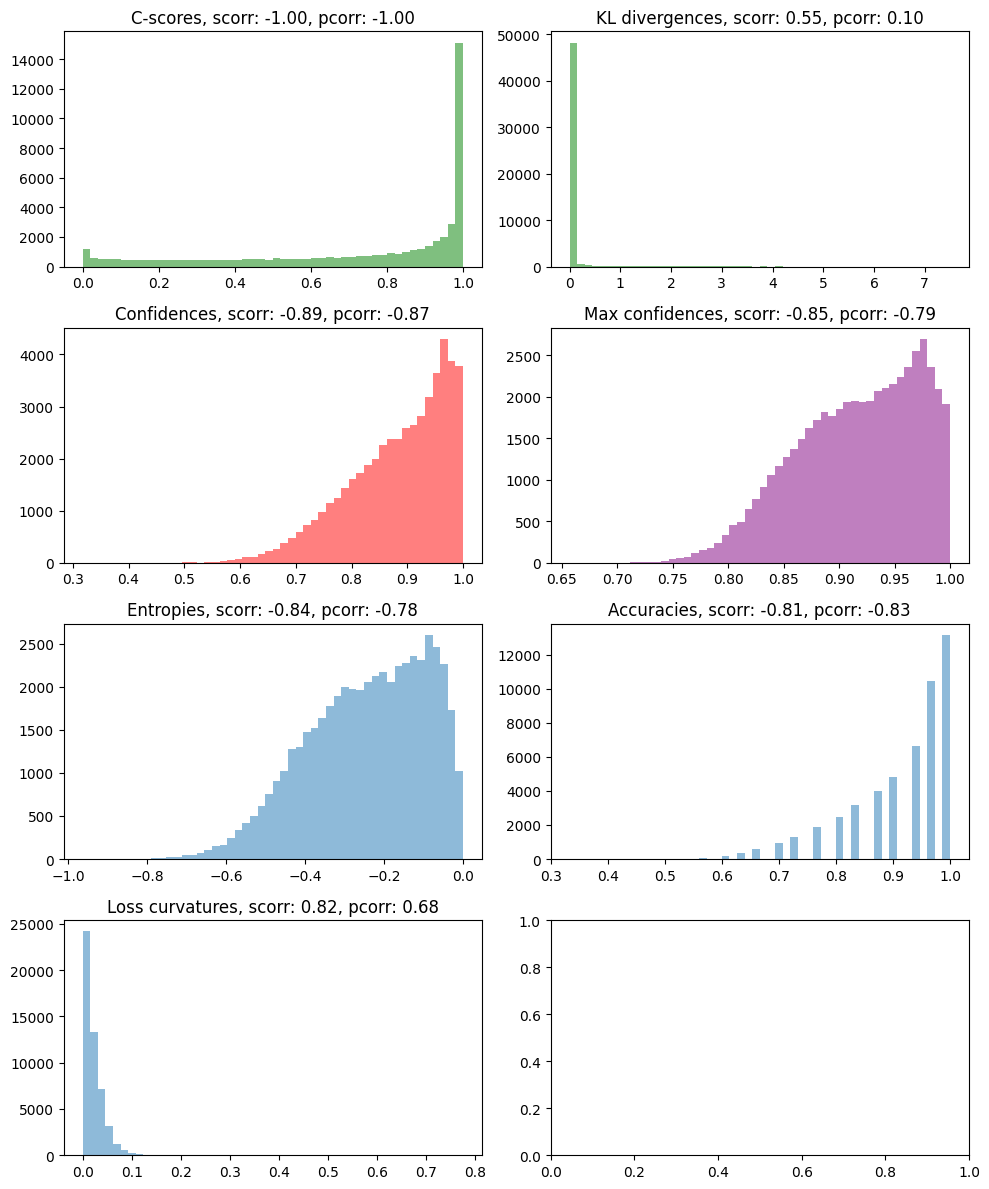

In [6]:
import seaborn as sns

fig, axs = plt.subplots(4, 2, figsize=(10, 12))  # Adjust the figure size as per your preference

# Modify the spacing between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the spacing as per your preference

#axs[0, 0].hist(loaded_memorization, bins=10, color='blue', alpha=0.5)
#axs[0, 0].set_title('Memorizations')

axs[0, 0].hist(loaded_cscores, bins=50, color='green', alpha=0.5)
axs[0, 0].set_title('C-scores, scorr: {:0.2f}, pcorr: {:0.2f}'.format(mem_cs_scorr, mem_cs_pcorr))

axs[0, 1].hist(loaded_klscores, bins=50, color='green', alpha=0.5)
axs[0, 1].set_title('KL divergences, scorr: {:0.2f}, pcorr: {:0.2f}'.format(mem_kl_scorr, mem_kl_pcorr))

axs[1, 0].hist(sorted_confidences[:, 2], bins=50, color='red', alpha=0.5)
axs[1, 0].set_title('Confidences, scorr: {:0.2f}, pcorr: {:0.2f}'.format(s_mean[0], p_mean[0]))

axs[1, 1].hist(sorted_confidences[:, 3], bins=50, color='purple', alpha=0.5)
axs[1, 1].set_title('Max confidences, scorr: {:0.2f}, pcorr: {:0.2f}'.format(s_mean[1], p_mean[1])) 

axs[2, 0].hist(sorted_confidences[:, 4], bins=50, alpha=0.5)
axs[2, 0].set_title('Entropies, scorr: {:0.2f}, pcorr: {:0.2f}'.format(s_mean[2], p_mean[2]))

axs[2, 1].hist(sorted_confidences[:, 5], bins=50, alpha=0.5)
axs[2, 1].set_title('Accuracies, scorr: {:0.2f}, pcorr: {:0.2f}'.format(s_mean[3], p_mean[3]))

axs[3, 0].hist(loss_curvatures, bins=50, alpha=0.5)
axs[3, 0].set_title('Loss curvatures, scorr: {:0.2f}, pcorr: {:0.2f}'.format(mem_lc_scorr, mem_lc_pcorr))

plt.tight_layout()

plt.show()

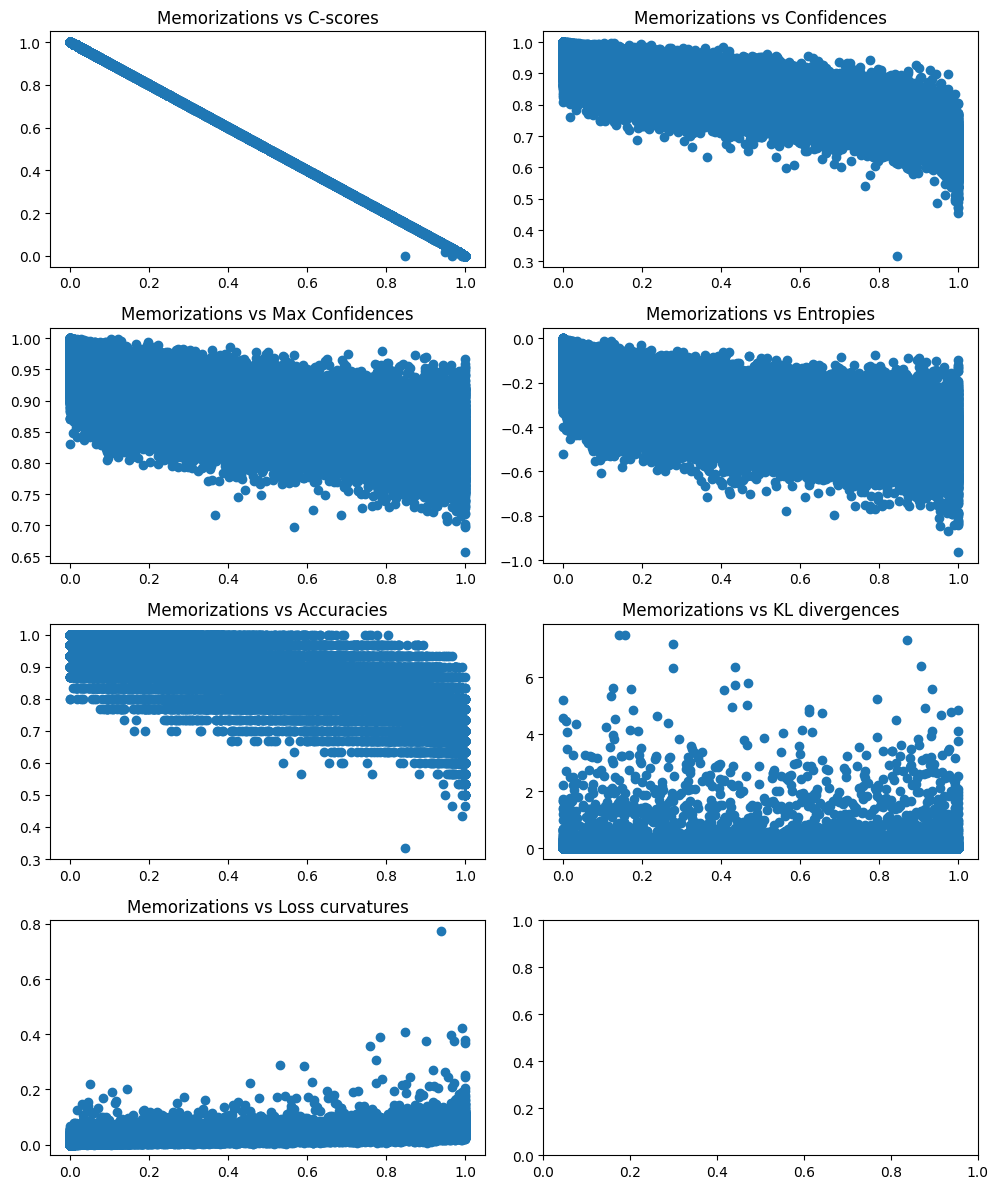

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(10, 12))  # Adjust the figure size as per your preference

# Modify the spacing between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the spacing as per your preference

axs[0, 0].scatter(loaded_memorization, loaded_cscores)
axs[0, 0].set_title('Memorizations vs C-scores')

axs[0, 1].scatter(loaded_memorization, sorted_confidences[:, 2])
axs[0, 1].set_title('Memorizations vs Confidences')

axs[1, 0].scatter(loaded_memorization, sorted_confidences[:, 3])
axs[1, 0].set_title('Memorizations vs Max Confidences')

axs[1, 1].scatter(loaded_memorization, sorted_confidences[:, 4])
axs[1, 1].set_title('Memorizations vs Entropies')

axs[2, 0].scatter(loaded_memorization, sorted_confidences[:, 5])
axs[2, 0].set_title('Memorizations vs Accuracies')

axs[2, 1].scatter(loaded_memorization, loaded_klscores)
axs[2, 1].set_title('Memorizations vs KL divergences')

axs[3, 0].scatter(loaded_memorization, loss_curvatures)
axs[3, 0].set_title('Memorizations vs Loss curvatures')

plt.tight_layout()

plt.show()
